In [1]:
import pandas as pd
import numpy as np
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import difflib
## Stats on Output and Citation

# Load and clean the output file
aujour_or = pd.read_csv("2010AJR.csv")

aujour_or = aujour_or.drop(aujour_or.columns[[0]], axis=1)
aujour_or = aujour_or.drop(aujour_or.columns[[range(2,8)]], axis=1)


aujour_or = aujour_or.rename(columns = {"Title":"VolumeTitle"})
aujour_or["ISSN1"] = aujour_or.ISSN1.str.replace('X', '')
aujour_or["ISSN2"] = aujour_or.ISSN2.str.replace('X', '')
aujour_or["ISSN3"] = aujour_or.ISSN3.str.replace('X', '')
aujour_or["ISSN4"] = aujour_or.ISSN4.str.replace('X', '')
aujour_or["ISSN1"] = aujour_or.ISSN1.str.replace('-', '')
aujour_or["ISSN2"] = aujour_or.ISSN2.str.replace('-', '')
aujour_or["ISSN3"] = aujour_or.ISSN3.str.replace('-', '')
aujour_or["ISSN4"] = aujour_or.ISSN4.str.replace('-', '')
aujour_or

,Rank,VolumeTitle,ISSN1,ISSN2,ISSN3,ISSN4
0,C,1913: a journal of forms,15489914,NaN,NaN,NaN
1,B,3CMedia,18326161,1445971,NaN,NaN
2,C,4OR: A Quarterly Journal of Operations Research,16194500,03908127,NaN,NaN
3,C,A St A: Advances in Statistical Analysis,18638171,1863818,00026018,NaN
4,A,AA files: annals of the Architectural Associat...,02616823,NaN,NaN,NaN
5,B,AACE International Transactions,15287106,NaN,NaN,NaN
6,B,AACE Journal,15513696,NaN,NaN,NaN
7,C,AACN Advanced Critical Care,15597768,15597776,10790713,NaN
8,C,AANA Journal,00946354,NaN,NaN,NaN
9,C,AAOHN Journal,08910162,NaN,NaN,NaN


In [2]:
refcs_or = pd.read_csv("REF2014Dataoutput.csv")

refcs_or = refcs_or.drop(refcs_or.columns[[1,2,3,6,7]], axis=1)
refcs_or = refcs_or.drop(refcs_or.columns[[range(10,29)]], axis=1)
refcs_or = refcs_or.drop(refcs_or.columns[[1,2,4,5,6,7,8,10]], axis=1)
refcs_or["ISSN"] = refcs_or.ISSN.str.replace('X', '')
refcs_or["ISSN"] = refcs_or.ISSN.str.replace('-', '')

refcs_or

,UKPRN,VolumeTitle,ISSN
0,10007759,Physica D,01672789
1,10007759,Computers and geosciences,00983004
2,10007759,Chemical biology and drug design,17470277
3,10007759,Journal of chemical information and modeling,15499596
4,10007759,Energy,03605442
5,10007759,Physiological measurement,09673334
6,10007759,International journal of digital crime and for...,19416210
7,10007759,Communications in nonlinear science and numeri...,10075704
8,10007759,PLoS ONE,19326203
9,10007759,Computers and geosciences,00983004


In [3]:
ref = {}
for index, row in refcs_or.iterrows():
    indexs = index
    ref[index] = row["ISSN"]
ref.get(7647)

'0924090 '

In [4]:
ajourone = {}
for index, row in aujour_or.iterrows():
    ajourone[row["ISSN1"]] = row["Rank"]

len(ajourone)

20712

In [5]:
ajourone.get("0924090")

'B'

In [6]:
ajourtwo = {}
for index, row in aujour_or.iterrows():
    ajourtwo[row["ISSN2"]] = row["Rank"]

len(ajourtwo)

11416

In [7]:
ajourthree = {}
for index, row in aujour_or.iterrows():
    ajourthree[row["ISSN3"]] = row["Rank"]

len(ajourthree)

1511

In [8]:
ajourfour = {}
for index, row in aujour_or.iterrows():
    ajourfour[row["ISSN4"]] = row["Rank"]

len(ajourfour)

212

In [9]:
ranklistone = {}

for index in ref:
    for issn in ajourone:
        if issn == ref[index]:
            ranklistone[index] = ajourone[issn]

In [10]:
ranklisttwo = {}

for index in ref:
    for issn in ajourtwo:
        if issn == ref[index]:
            ranklisttwo[index] = ajourtwo[issn]

In [11]:
ranklistthree = {}

for index in ref:
    for issn in ajourthree:
        if issn == ref[index]:
            ranklistthree[index] = ajourthree[issn]

In [12]:
ranklistfour= {}

for index in ref:
    for issn in ajourfour:
        if issn == ref[index]:
            ranklistfour[index] = ajourfour[issn]
            
ranklistfour

{1401: 'A*', 1456: 'A*', 3313: 'A*'}

In [13]:
ref_rankd = refcs_or
ref_rankd["Rank1"] = pd.Series(ranklistone)
ref_rankd["Rank2"] = pd.Series(ranklisttwo)
ref_rankd["Rank3"] = pd.Series(ranklistthree)
ref_rankd["Rank4"] = pd.Series(ranklistfour)

ref_rankd.loc[ref_rankd['Rank1'].isnull(),'Rank1'] = ref_rankd['Rank2']
ref_rankd.loc[ref_rankd['Rank1'].isnull(),'Rank1'] = ref_rankd['Rank3']
ref_rankd.loc[ref_rankd['Rank1'].isnull(),'Rank1'] = ref_rankd['Rank4']

ref_rankd = ref_rankd.drop(["Rank2", "Rank3", "Rank4"], axis = 1)

count_nan = len(ref_rankd) - ref_rankd.count()

ref_rankd

,UKPRN,VolumeTitle,ISSN,Rank1
0,10007759,Physica D,01672789,A*
1,10007759,Computers and geosciences,00983004,B
2,10007759,Chemical biology and drug design,17470277,C
3,10007759,Journal of chemical information and modeling,15499596,A
4,10007759,Energy,03605442,C
5,10007759,Physiological measurement,09673334,A
6,10007759,International journal of digital crime and for...,19416210,NaN
7,10007759,Communications in nonlinear science and numeri...,10075704,C
8,10007759,PLoS ONE,19326203,A
9,10007759,Computers and geosciences,00983004,B


In [48]:
totastar ={}
tota = {}
totb = {}
totc = {}
totjur = {}

totastara = {}

for index,row in ref_rankd.iterrows():
    if row["Rank1"] == "A*":
        if row["UKPRN"] not in totastar:
            totastar[row["UKPRN"]] = 1
        else:
            totastar[row["UKPRN"]] += 1
    else:
        if row["UKPRN"] not in totastar:
            totastar[row["UKPRN"]] = 0
    
    if row["Rank1"] == "A":
        if row["UKPRN"] not in tota:
            tota[row["UKPRN"]] = 1
        else:
            tota[row["UKPRN"]] += 1
    else:
        if row["UKPRN"] not in tota:
            tota[row["UKPRN"]] = 0
            
    if row["Rank1"] == "B":
        if row["UKPRN"] not in totb:
            totb[row["UKPRN"]] = 1
        else:
            totb[row["UKPRN"]] += 1
    else:
        if row["UKPRN"] not in totb:
            totb[row["UKPRN"]] = 0
            
    if row["Rank1"] == "C":
        if row["UKPRN"] not in totc:
            totc[row["UKPRN"]] = 1
        else:
            totc[row["UKPRN"]] += 1
    else:
        if row["UKPRN"] not in totc:
            totc[row["UKPRN"]] = 0
        
    if row["UKPRN"] not in totjur:
        totjur[row["UKPRN"]] = 1
    else:
        totjur[row["UKPRN"]] += 1
        
    if row["Rank1"] == "A*" or row["Rank1"] == "A":
        if row["UKPRN"] not in totastara:
            totastara[row["UKPRN"]] = 1
        else:
            totastara[row["UKPRN"]] += 1
    else:
        if row["UKPRN"] not in totastara:
            totastara[row["UKPRN"]] = 0

In [49]:
## Now to add the four star rating
fourstr = pd.read_csv("REF2014Datasubmission.csv")



fourstr = fourstr[fourstr["Profile"].str.contains("Overall")]


fourstrdic = {}
threestrdic = {}
twostrdic = {}
onestrdic = {}

for index, row in fourstr.iterrows():
    fourstrdic[row["UKPRN"]] = row["FourStar"]
    threestrdic[row["UKPRN"]] = row["ThreeStar"]
    twostrdic[row["UKPRN"]] = row["TwoStar"]
    onestrdic[row["UKPRN"]] = row["OneStar"]


In [50]:
avastara = {}

for universityaa in totastara:
    for universitiesaa in totjur:
        if universitiesaa == universityaa:
            avastara[universitiesaa] = totastara[universityaa]/totjur[universitiesaa]*100

In [51]:
avastar = {}

for university in totastar:
    for universities in totjur:
        if universities == university:
            avastar[universities] = totastar[university]/totjur[universities]*100

In [52]:
ava = {}

for universitya in tota:
    for universitiesa in totjur:
        if universitiesa == universitya:
            ava[universitiesa] = tota[universitya]/totjur[universitiesa]*100

In [53]:
avb = {}

for universityb in totb:
    for universitiesb in totjur:
        if universitiesb == universityb:
            avb[universitiesb] = totb[universityb]/totjur[universitiesb]*100

In [54]:
avc = {}

for universityc in totc:
    for universitiesc in totjur:
        if universitiesc == universityc:
            avc[universitiesc] = totc[universityc]/totjur[universitiesc]*100

In [55]:
rankfoura = {}

for uniaa in fourstrdic:
    for unisaa in avastara:
        if unisaa == uniaa:
            rankfoura[avastara[unisaa]] = fourstrdic[uniaa]

In [56]:
rankfour = {}

for uni in fourstrdic:
    for unis in avastar:
        if unis == uni:
            rankfour[avastar[unis]] = fourstrdic[uni]

In [57]:
rankthree = {}

for unia in threestrdic:
    for unisa in ava:
        if unisa == unia:
            rankthree[ava[unisa]] = threestrdic[unia]

In [58]:
ranktwo = {}

for unib in twostrdic:
    for unisb in avb:
        if unisb == unib:
            ranktwo[avb[unisb]] = twostrdic[unib]

In [59]:
rankone = {}

for unic in onestrdic:
    for unisc in avc:
        if unisc == unic:
            rankone[avc[unisc]] = onestrdic[unic]

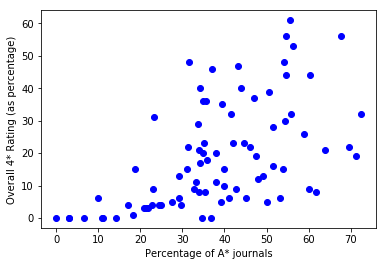

In [60]:
import matplotlib.pylab as plt
%matplotlib inline

listsfa = sorted(rankfoura.items())
listsf = sorted(rankfour.items()) # sorted by key, return a list of tuples
listst = sorted(rankthree.items()) # sorted by key, return a list of tuples
liststw = sorted(ranktwo.items()) # sorted by key, return a list of tuples
listso = sorted(rankone.items()) # sorted by key, return a list of tuples

xastara,yastara = zip(*listsfa)
xastar, yastar = zip(*listsf) # unpack a list of pairs into two tuples
xa, ya = zip(*listst) # unpack a list of pairs into two tuples
xb, yb = zip(*liststw) # unpack a list of pairs into two tuples
xc, yc = zip(*listso) # unpack a list of pairs into two tuples


#plt.subplots(2,2, figsize = [16,10])
plt.plot(xastara,yastara, "bo")
plt.xlabel("Percentage of A* journals")#
plt.ylabel("Overall 4* Rating (as percentage)")

#plt.plot(xb,yb, "bo")
#plt.xlabel("Percentage of B journals")
#plt.ylabel("Overall 2* Rating (as percentage)")

#plt.subplots(2,2, figsize = [16,10])
#plt.plot(xa,ya, "bo")
#plt.xlabel("Percentage of A journals")
#plt.ylabel("Overall 3* Rating (as percentage)")
#plt.savefig("A vs 3star")

#plt.subplots(2,2, figsize = [16,10])
#plt.plot(xastar,yastar, "bo")
#plt.xlabel("Percentage of A* journals")#
#plt.ylabel("Overall 4* Rating (as percentage)")
#plt.savefig("Astar vs 4star")


In [61]:
from scipy.stats.stats import pearsonr

pearsonr(xastara,yastara)

(0.55655630282511226, 4.6719871778465074e-08)